In [7]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

In [8]:
df=pd.read_csv(r'C:\Users\danie\OneDrive\Desktop\WGU\208 Final\churn_prepared.xls')

In [9]:
nulls = df.isnull().any()
print(nulls)

Unnamed: 0           False
CaseOrder            False
Customer_id          False
Interaction          False
UID                  False
Children             False
Age                  False
Income               False
Gender               False
Churn                False
StreamingTV          False
Bandwidth_GB_Year    False
dtype: bool


In [10]:
df.describe()

,Unnamed: 0,CaseOrder,Children,Age,Income,Bandwidth_GB_Year
count,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000,9960.000000
mean,5000.381426,5001.381426,2.088454,53.097892,39262.204328,3392.463974
std,2886.590495,2886.590495,2.147374,20.701925,26860.817188,2185.217038
min,0.000000,1.000000,0.000000,18.000000,348.670000,155.506715
25%,2499.750000,2500.750000,0.000000,35.000000,19167.297500,1236.063469
50%,5000.500000,5001.500000,1.000000,53.000000,33028.830000,3287.404961
75%,7500.250000,7501.250000,3.000000,71.000000,52921.635000,5585.644211
max,9999.000000,10000.000000,10.000000,89.000000,152172.920000,7158.981530


In [11]:
df['gender_dummy'] = [1 if v == 'Female' else 0 for v in df['Gender']]
df['churn_dummy'] = [1 if v == 'Yes' else 0 for v in df['Churn']]

In [13]:
print(df)

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9955        9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9956        9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9957        9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9958        9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9959        9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                           

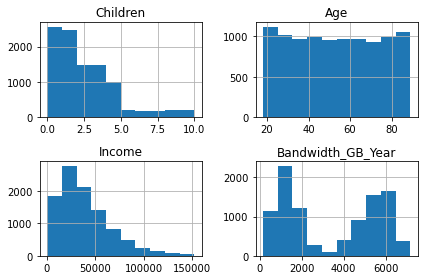

In [14]:
df[['Children', 'Age', 'Income','Bandwidth_GB_Year']].hist()
plt.tight_layout()

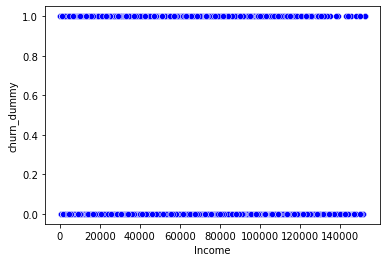

In [15]:
sns.scatterplot(x=df['Income'], y= df['churn_dummy'], color='blue')
plt.show();

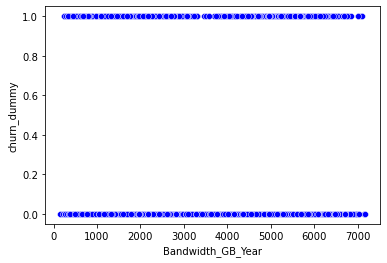

In [16]:
sns.scatterplot(x=df['Bandwidth_GB_Year'], y= df['churn_dummy'], color='blue')
plt.show();

In [17]:
df['Intercept'] = 1


In [18]:
#Logistic Regression Model #!

log_reg_results = sm.Logit(df['churn_dummy'], df[['Children', 'Age', 'Income', 'Bandwidth_GB_Year','gender_dummy', 'Intercept']]).fit()
print (log_reg_results.summary())


Optimization terminated successfully.
         Current function value: 0.468881
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            churn_dummy   No. Observations:                 9960
Model:                          Logit   Df Residuals:                     9954
Method:                           MLE   Df Model:                            5
Date:                Sat, 19 Nov 2022   Pseudo R-squ.:                  0.1883
Time:                        20:41:32   Log-Likelihood:                -4670.1
converged:                       True   LL-Null:                       -5753.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Children              0.0089      0.012      0.747      0.455      -0.014       0.032
Age     

In [19]:
#Logistic Regression Reduced Model #2
log_reg_results = sm.Logit(df['churn_dummy'], df[['Bandwidth_GB_Year','gender_dummy', 'Intercept']]).fit()
print (log_reg_results.summary())


Optimization terminated successfully.
         Current function value: 0.468920
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            churn_dummy   No. Observations:                 9960
Model:                          Logit   Df Residuals:                     9957
Method:                           MLE   Df Model:                            2
Date:                Sat, 19 Nov 2022   Pseudo R-squ.:                  0.1883
Time:                        20:41:37   Log-Likelihood:                -4670.4
converged:                       True   LL-Null:                       -5753.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Bandwidth_GB_Year    -0.0006   1.46e-05    -39.055      0.000      -0.001      -0.001
gender_d